In [12]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

In [3]:
# Help me in reading the goodreads_books.json file
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
with open('goodreads_books.json', 'r') as f:
    data = []
    for line in f:
        data.append(json.loads(line))

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(df.head())

# Display the columns of the DataFrame
print(df.columns)



         isbn text_reviews_count    series country_code language_code  \
0  0312853122                  1        []           US                 
1  0743509986                  6        []           US                 
2                              7  [189911]           US           eng   
3  0743294297               3282        []           US           eng   
4  0850308712                  5        []           US                 

                                     popular_shelves        asin is_ebook  \
0  [{'count': '3', 'name': 'to-read'}, {'count': ...                false   
1  [{'count': '2634', 'name': 'to-read'}, {'count...                false   
2  [{'count': '58', 'name': 'to-read'}, {'count':...  B00071IKUY    false   
3  [{'count': '7615', 'name': 'to-read'}, {'count...                false   
4  [{'count': '32', 'name': 'to-read'}, {'count':...                false   

  average_rating kindle_asin  ... publication_month edition_information  \
0           4.00       

In [4]:
# print the nooofrows in data frame
print(df.shape[0])  # These are the noof books in the dataset

2360655


## Now let us load the goodreads interactions.csv file and convert it in the required format and store in pickle file 

In [13]:
# read the csv file from goodreads_interactions.csv the fle is in the same directory
interactions = pd.read_csv('goodreads_interactions.csv')
# and print the first few rows of the data frame
print(interactions.head())



   user_id  book_id  is_read  rating  is_reviewed
0        0      948        1       5            0
1        0      947        1       5            1
2        0      946        1       5            0
3        0      945        1       5            0
4        0      944        1       5            0


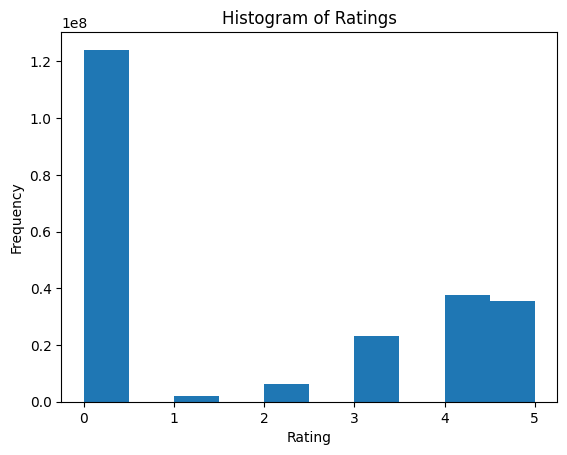

In [14]:
# Now do the data analysis in the interactions data frame 
# plot the histogram of the ratings
plt.hist(interactions['rating'])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()


In [15]:
# Plot the noof rows in a data frame
print(interactions.shape[0])  # These are the noof interactions in the dataset

# Now also plot the noof unique users in the dataset
print(interactions['user_id'].nunique())

# Now also plot the noof unique books in the dataset
print(interactions['book_id'].nunique())


228648342
876145
2360650


In [16]:
# Now i want data as a dictionary where keys are dict_keys(['train', 'val', 'test', 'train_indices', 'val_indices', 'test_indices']) and where each value is also a dictionary with keys dict_keys(['user_id', 'book_id', 'rating']) and values are the corresponding data for that split.
# I will use the following code to do this
# First i will split the data into train, val and test
# Then i will convert the data into a dictionary
# Then i will print the data
# Then i will save the data into a pickle file

# Split the data into train, val and test 

# first do a on 100 interactions

# interactions = interactions.sample(100)

train = interactions.sample(frac=0.8)
interactions = interactions.drop(train.index)
val = interactions.sample(frac=0.5)
test = interactions.drop(val.index)

# Convert the data into a dictionary where the key train has a list of dictionaries where each dictionary has keys user_id, book_id and rating
train_data = []
for index, row in train.iterrows():
    train_data.append({'user_id': row['user_id'], 'book_id': row['book_id'], 'rating': row['rating']})
    
val_data = []
for index, row in val.iterrows():
    val_data.append({'user_id': row['user_id'], 'book_id': row['book_id'], 'rating': row['rating']})
    
test_data = []  
for index, row in test.iterrows():
    test_data.append({'user_id': row['user_id'], 'book_id': row['book_id'], 'rating': row['rating']})
    
# Create the dictionary
data = {'train': train_data, 'val': val_data, 'test': test_data, 'train_indices': train.index.tolist(), 'val_indices': val.index.tolist(), 'test_indices': test.index.tolist()}


# save the data into a pickle file
import pickle
with open('goodreads_interactions.pkl', 'wb') as f:
    pickle.dump(data, f)
    
# Load the data from the pickle file
with open('goodreads_interactions.pkl', 'rb') as f:
    data = pickle.load(f)
    
test_data = data['test']
print(len(test_data))

print(test_data[0])


print("Loaded the data from the pickle file successfully!")



22864834
{'user_id': 0, 'book_id': 948, 'rating': 5}
Loaded the data from the pickle file successfully!


In [11]:
data['test'][0]

{'user_id': 266766, 'book_id': 378269, 'rating': 4}